In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("datos/df_merged_clean.csv", index_col=0)

In [5]:
df.columns

Index(['superior_body_code', 'name_superior_body', 'organ_code', 'organ_name',
       'management_unit_code', 'name_management_unit', 'economy_category',
       'source_revenue', 'recipe_species', 'detailing',
       'updated_estimated_value', 'value_launched', 'realized_value',
       'percentage_realized', 'release_date', 'financial_year'],
      dtype='object')

Vamos a comprobar si hay filas donde todos los valores monetarios sean 0. Esto nos podría servir para analizar posteriormente si son datos erróneos o presentan alguna relevancia.

In [125]:
df_vals_zeros = df[(df.filter(like = "value") == 0).all(axis = 1)]

In [134]:
df_vals_zeros.shape[0]

3428

In [135]:
print(f'Los datos con todas las filas de valores 0 representan un {df_vals_zeros.shape[0]/df.shape[0]*100:.4f}% de los totales.')

Los datos con todas las filas de valores 0 representan un 0.3340% de los totales.


Vemos que realmente estos datos representan una mínima proporción en nuestros datos totales. Una opción posible y simple sería eliminarlos, ya que no afectarían significativamente en nuestros análisis de ingresos posterior. Sin embargo, lo conveniente será analizar si hay una cierta tendencia en estos datos.

Vamos a comprobar si estos datos provienen de algún cuerpo superior en específico.

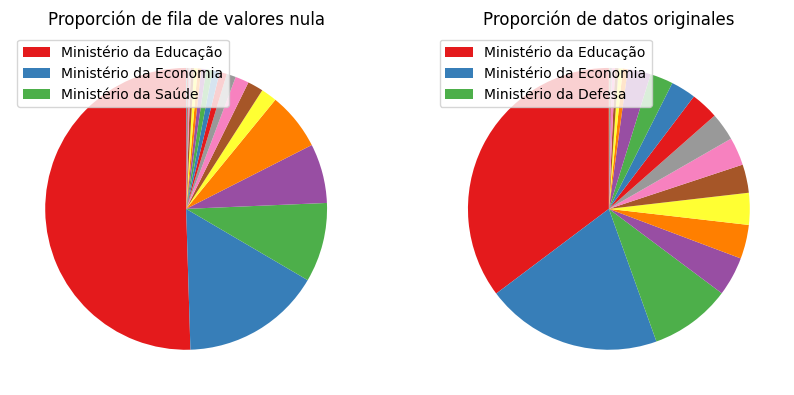

In [91]:
df_vals_zeros = df[(df.filter(like = "value") == 0).all(axis = 1)]
labels_sup = df_vals_zeros["name_superior_body"].value_counts().keys()
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.title("Proporción de fila de valores nula")
patches, texts = plt.pie(x = df_vals_zeros["name_superior_body"].value_counts(), startangle=90, colors=sns.color_palette('Set1'))
plt.legend(patches, labels_sup[:3], loc="upper left")
plt.subplot(1,2,2)
plt.title("Proporción de datos originales")
patches, texts = plt.pie(x = df["name_superior_body"].value_counts(), startangle=90, colors=sns.color_palette('Set1'))
plt.legend(patches, df["name_superior_body"].value_counts().keys()[:3], loc="upper left")

plt.show()

Observamos que, comparando con las proporciones de datos originales, sí que hay una concentración distinta de estos valores 
cero en el Ministerio de Educación, lo cual podría indicar que los registros llevados a cabo en éste estén siendo gestionados de forma erónea. 
Esta información puede resultar útil en caso de necesitar realizar una investigación para optimizar los registros de actividad económica.

Otro factor que podría ser relevante sería el año fiscal de estos registros. Para ello veamos las concentraciones de estos en cuanto a año y comparemos con los originales.

In [112]:
print("Datos con nulos")
print(df_vals_zeros["financial_year"].value_counts(normalize=True).sort_index())
print("\nDatos originales")
print(df["financial_year"].value_counts(normalize=True).sort_index())

Datos con nulos
financial_year
2013.0    0.001459
2014.0    0.004084
2016.0    0.126604
2017.0    0.101809
2018.0    0.129230
2019.0    0.212660
2020.0    0.220537
2021.0    0.203617
Name: proportion, dtype: float64

Datos originales
financial_year
2013.0    0.004383
2014.0    0.004436
2015.0    0.004407
2016.0    0.189548
2017.0    0.185598
2018.0    0.169487
2019.0    0.172297
2020.0    0.138700
2021.0    0.131144
Name: proportion, dtype: float64


Vemos que los datos se concentran principalmente entre 2019 a 2021, lo cual sigue la misma tendencia que en los datos originales,
por lo que en este período todo parece consistente. En el año 2015 sin embargo, vemos que no hay ni un solo registro donde todos los valores 
monetarios sean 0. Esto podría haberse dado por diferentes razones, como la crisis económica del 2014 en Brasil, que pudo haber puesto en alerta al gobierno para llevar mejores registros, o bien, que en 2015 se tuviera más en consideración las estimaciones de los ingresos que se efectuarían en cada una de las iniciativas, rechazando cualquiera que no tuviera una estimación inicial.

Ahora que hemos explorado brevemente estos datos, vamos a proceder eliminando estos datos de nuestro dataframe.

In [137]:
df_no_zeros = df.drop(df_vals_zeros.index)

De igual forma podríamos eliminar aquellos registros donde todas las columnas de valores sean nulos.

In [153]:
df_clean = df_no_zeros.drop(df_no_zeros[df_no_zeros.filter(like="value").isna().all(axis=1)].index)

In [165]:
print(f"Datos eliminados: {(df.shape[0] - df_clean.shape[0])/df.shape[0]*100:.4f}%")

Datos eliminados: 0.3393%
